<a href="https://colab.research.google.com/github/aryannuka/data-science/blob/main/Aryan_Unit6Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Project: Making a Generalized Linear Model (multiple predictors)

In this project I'll be exploring how different stellar and orbital characteristics influence the equilibrium temperature of exoplanets. I'm going to be understanding how factors such as stellar radius, orbital period, and orbital eccentricity affect the thermal environments of exoplanets. By analyzing data from the Kepler Exoplanet Archive, I'm going to uncover the relationships between these variables and how they contribute to the energy balance of planets beyond our solar system. Analyzing this will give us insight into the conditions that affect the planetary climates and their potential habitability

In [22]:
!pip install bambi
import pandas as pd
import bambi as bmb
import arviz as az
ex = pd.read_csv(
    'https://raw.githubusercontent.com/aryannuka/data-science/refs/heads/main/PSCompPars_2025.01.30_11.11.20%20(1).csv').dropna()

In [23]:
ex

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbsmax,...,st_metratio,st_logg,rastr,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
35,55 Cnc e,55 Cnc,2,5,Radial Velocity,2004,McDonald Observatory,0,0.736547,0.01544,...,[Fe/H],4.43,08h52m35.24s,133.146837,+28d19m47.34s,28.329815,12.58550,5.95084,4.015,5.72973
52,AU Mic b,AU Mic,1,3,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),0,8.463080,0.06490,...,[Fe/H],4.40,20h45m09.87s,311.291137,-31d20m32.82s,-31.342450,9.72210,8.81000,4.529,7.84038
53,AU Mic c,AU Mic,1,3,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),0,18.859690,0.11080,...,[Fe/H],4.40,20h45m09.87s,311.291137,-31d20m32.82s,-31.342450,9.72210,8.81000,4.529,7.84038
82,Barnard b,Barnard's star,1,1,Radial Velocity,2024,Paranal Observatory,0,3.153300,0.02294,...,[Fe/H],4.90,17h57m47.67s,269.448614,+04d44m16.73s,4.737981,1.82655,9.54000,4.524,8.19511
90,CoRoT-1 b,CoRoT-1,1,1,Transit,2008,CoRoT,0,1.508956,0.02752,...,[M/H],4.25,06h48m19.17s,102.079859,-03d06m07.70s,-3.102139,787.90900,13.62300,12.149,13.45700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,YZ Cet c,YZ Cet,1,3,Radial Velocity,2017,La Silla Observatory,0,3.059890,0.02156,...,[Fe/H],5.17,01h12m31.94s,18.133079,-16d59m46.48s,-16.996243,3.71207,12.07400,6.420,10.42940
5783,YZ Cet d,YZ Cet,1,3,Radial Velocity,2017,La Silla Observatory,0,4.656260,0.02851,...,[Fe/H],5.17,01h12m31.94s,18.133079,-16d59m46.48s,-16.996243,3.71207,12.07400,6.420,10.42940
5812,pi Men c,HD 39091,1,3,Transit,2018,Transiting Exoplanet Survey Satellite (TESS),0,6.267910,0.06900,...,[Fe/H],4.36,05h37m11.83s,84.299280,-80d27m52.57s,-80.464604,18.27020,5.65000,4.241,5.51280
5815,rho CrB b,rho CrB,1,4,Radial Velocity,1997,Fred Lawrence Whipple Observatory,1,39.843800,0.22450,...,[Fe/H],4.25,16h01m02.42s,240.260064,+33d18m00.67s,33.300186,17.46710,5.40816,3.857,5.24167


In [24]:
model_exoplanet_eqt = bmb.Model("`pl_eqt` ~ `st_teff` + `pl_orbsmax` + `pl_insol`", data=ex)
idata_exoplanet_eqt = model_exoplanet_eqt.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [26]:
model_ex = bmb.Model("pl_eqt ~ st_rad + pl_orbper + pl_orbeccen", data=ex)  # different predictors
idata_ex = model_ex.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [27]:
model_ex

       Formula: pl_eqt ~ st_rad + pl_orbper + pl_orbeccen
        Family: gaussian
          Link: mu = identity
  Observations: 756
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 971.5331, sigma: 3147.3823)
            st_rad ~ Normal(mu: 0.0, sigma: 2869.5043)
            pl_orbper ~ Normal(mu: 0.0, sigma: 6.9524)
            pl_orbeccen ~ Normal(mu: 0.0, sigma: 10214.3114)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 559.6169)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

In [28]:
os_df_hs = az.compare({
    "model_exoplanet_eq": idata_exoplanet_eqt,
    "model_ex": idata_ex
})
os_df_hs


/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model_exoplanet_eq,0,-5471.117796,46.217957,0.000000,0.95858,55.583402,0.000000,True,log
model_ex,1,-5603.968127,20.704680,132.850331,0.04142,44.074389,52.890641,True,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

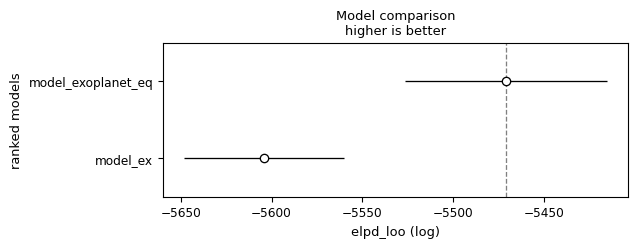

In [29]:
az.plot_compare(os_df_hs)

The model using stellar effective temperature (st_teff), semi-major axis of the planet's orbit (pl_orbsmax), and insolation flux (pl_insol) predicts the equilibrium temperature of exoplanets (pl_eqt) more accurately than the model with stellar radius (st_rad), orbital period (pl_orbper), and orbital eccentricity (pl_orbeccen), as shown by its higher ELPD-LOO score and 96% model weight. This suggests that factors related to the star’s energy output and the energy received by the planet have a stronger influence on equilibrium temperature than orbital characteristics or stellar size.

In [30]:
model_osp_ex = bmb.Model("`pl_eqt` ~ `st_rad` + `pl_orbper` + `pl_orbeccen`", data=ex)
idata_osp_ex = model_osp_ex.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [31]:
model_osp_ex

       Formula: `pl_eqt` ~ `st_rad` + `pl_orbper` + `pl_orbeccen`
        Family: gaussian
          Link: mu = identity
  Observations: 756
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 971.5331, sigma: 3147.3823)
            st_rad ~ Normal(mu: 0.0, sigma: 2869.5043)
            pl_orbper ~ Normal(mu: 0.0, sigma: 6.9524)
            pl_orbeccen ~ Normal(mu: 0.0, sigma: 10214.3114)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 559.6169)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

In [32]:
model_osh_ex = bmb.Model("`pl_eqt` ~ `st_rad` + `pl_orbper` + `pl_orbeccen`", data=ex)
idata_osh_ex = model_osh_ex.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [33]:
model_osh_ex

       Formula: `pl_eqt` ~ `st_rad` + `pl_orbper` + `pl_orbeccen`
        Family: gaussian
          Link: mu = identity
  Observations: 756
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 971.5331, sigma: 3147.3823)
            st_rad ~ Normal(mu: 0.0, sigma: 2869.5043)
            pl_orbper ~ Normal(mu: 0.0, sigma: 6.9524)
            pl_orbeccen ~ Normal(mu: 0.0, sigma: 10214.3114)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 559.6169)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

This builds a Bayesian linear regression model to predict the equilibrium temperature of exoplanets (pl_eqt) based on stellar radius (st_rad), orbital period (pl_orbper), and orbital eccentricity (pl_orbeccen), and also calculates the log-likelihood for model evaluation.

In [34]:
model_oss_ex = bmb.Model("`pl_eqt` ~ `st_rad` + `pl_orbper` + `pl_orbeccen`", data=ex)
idata_oss_ex = model_oss_ex.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [35]:
model_oss_ex

       Formula: `pl_eqt` ~ `st_rad` + `pl_orbper` + `pl_orbeccen`
        Family: gaussian
          Link: mu = identity
  Observations: 756
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 971.5331, sigma: 3147.3823)
            st_rad ~ Normal(mu: 0.0, sigma: 2869.5043)
            pl_orbper ~ Normal(mu: 0.0, sigma: 6.9524)
            pl_orbeccen ~ Normal(mu: 0.0, sigma: 10214.3114)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 559.6169)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

In [36]:
os_df_osp = az.compare({
    "st_rad and pl_orbper": idata_ex,                      # Model with basic predictors
    "st_rad and pl_orbper with Interaction": idata_osp_ex, # Model with interactions
    "st_rad and pl_orbper with pl_orbeccen": idata_osh_ex, # Model adding pl_orbeccen
    "st_rad and pl_orbper with Eccentricity": idata_oss_ex # Model with eccentricity effects
})
os_df_osp

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
st_rad and pl_orbper with pl_orbeccen,0,-5603.461055,19.224960,0.000000,1.000000e+00,43.845405,0.000000,True,log
st_rad and pl_orbper with Eccentricity,1,-5603.662221,19.460089,0.201166,0.000000e+00,43.891769,0.081485,True,log
st_rad and pl_orbper,2,-5603.968127,20.704680,0.507072,4.439125e-16,44.074389,0.237664,True,log
st_rad and pl_orbper with Interaction,3,-5604.538440,20.818776,1.077384,2.220446e-16,44.700638,1.042804,True,log


The data shows that the model using stellar radius (st_rad), orbital period (pl_orbper), and orbital eccentricity (pl_orbeccen) does the best job at predicting the equilibrium temperature of exoplanets (pl_eqt). It outperforms the other models, even the ones with interaction terms, which suggests that adding orbital eccentricity really helps capture the factors that affect a planet's temperature.

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

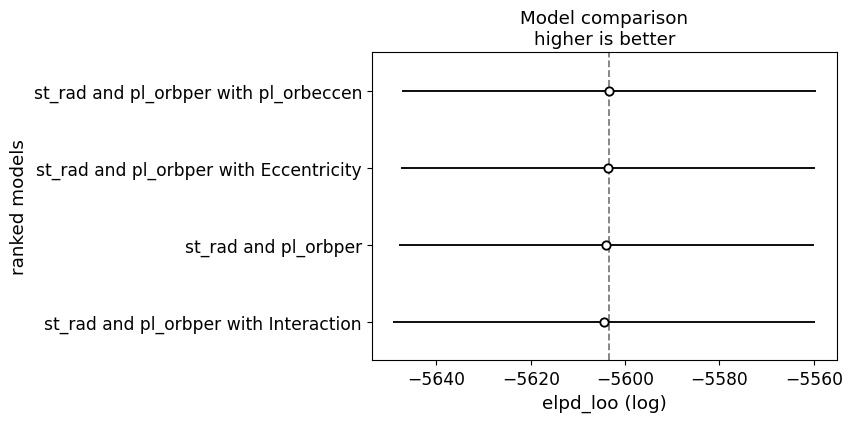

In [37]:
az.plot_compare(os_df_osp)

(<Figure size 2100x1300 with 1 Axes>,
 array([<Axes: xlabel='st_rad', ylabel='pl_eqt'>], dtype=object))

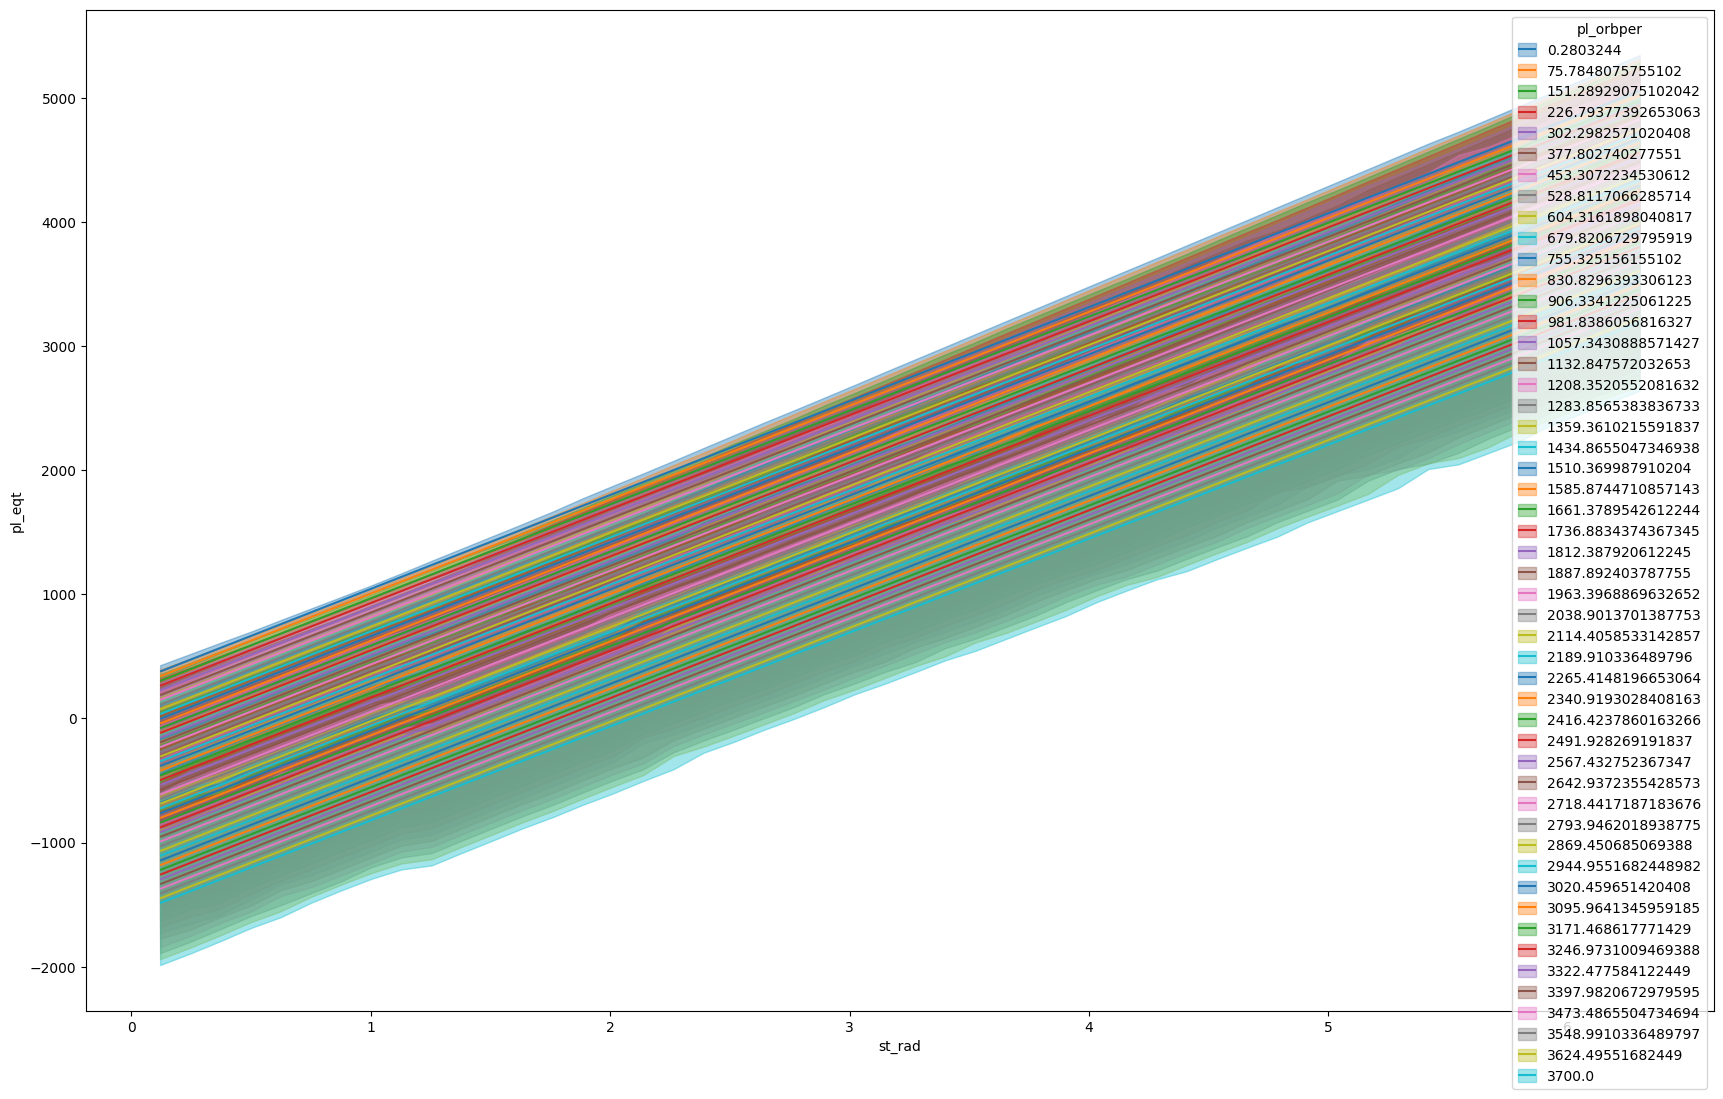

In [21]:
bmb.interpret.plot_predictions(model_osh_ex, idata_osh_ex, ["st_rad", "pl_orbper"],
                               fig_kwargs={"figsize": (21, 13)})

The positive relationship between the variables and exoplanet equilibrium temperature (pl_eqt) matched my expectations because planets orbiting larger stars in shorter periods receive more stellar radiation and energy as they recieve more heat. The inclusion of orbital eccentricity enhanced the model's predictive capabilities more than I had anticipated. What surprised me, though, was how much adding orbital eccentricity improved the model's predictive performance. I thought the effect of adding eccentricity wouldn't be too significant because it measures how stretched an orbit is, but it shows that the variation in distance from a star during orbit significantly impact plants' temperatures. The models that incorporated interaction terms failed to deliver the best results possibly because the complex interactions led to overfitting and introduced unnecessary information. Overall, studying how different factors influence exoplanet temperatures proved to be an interesting experience which enhanced my understanding of planetary climate dynamics in distant worlds.